In [1]:
%%html

<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>

<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

<img src="../images/conductivity.jpg" width="500px" />

# Investigating Conductivity

Based on Activity D-3 from _Science in Action 9_, Addison Wesley, pg. 299.  

## The Question  
How does the conductivity of different solutions compare?

## The Hypothesis
Reword the question to form a hypothesis.

## Materials & Equipment
• 100-mL graduated cylinder  
• 250-mL beaker  
• distilled water  
• conductivity tester  
• tap water  
• salt water  
• vinegar  
• copper(II) sulfate solution  
• other solutions provided by your teacher

## Procedure
1 Put 50 mL of distilled water into a 250-mL beaker.  
2 Place the metal tips of your conductivity tester in the distilled water.  
3 Record the conductivity reading of the distilled water in the table below. If your conductivity tester is a light bulb, describe the brightness of the bulb.  
4 Repeat steps 2–4 with 50-mL samples of tap water, salt water, vinegar, copper(II) sulfate solution, and any other solution you wish to test. After each conductivity measurement, empty the beaker and rinse it with distilled water. Also wipe off the tips of the conductivity tester. Make sure that you insert them to the same depth in each solution.  
5 When you have finished testing the solutions, follow your teacher’s instructions for disposing of them.

In [2]:
import pandas as pd
import numpy as np
import qgrid
df = pd.DataFrame(index=pd.Series(['Distilled Water', 'Tap Water', 'Salt Water', 'Vinegar', 'Copper Sulfate']), columns=pd.Series(['Reading 1', 'Reading 2','Notes']))
df_widget = qgrid.QgridWidget(df =df, show_toolbar=True)
df_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defaultColumnWidth': 150, 'rowHeight': 28, 'enableColumnReorder': False, 'enableTextSelectionOnCells': True, 'editable': True, 'autoEdit': False, 'explicitInitialization': True, 'maxVisibleRows': 15, 'minVisibleRows': 8, 'sortable': True, 'filterable': True, 'highlightSelectedCell': False, 'highlightSelectedRow': True}, precision=5, show_toolbar=True)

In [3]:
from IPython.display import Javascript, display
from ipywidgets import widgets

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+2)'))

button = widgets.Button(description="Click to save data")
button.on_click(run_all)
display(button)


Button(description='Click to save data', style=ButtonStyle())

In [4]:
output_data = df_widget.get_changed_df()

## Analyzing and Interpreting
6 Were there differences in conductivity among the solutions you tested? How could you tell?  
7 Account for the differences in conductivity among the solutions by explaining what is happening in the solutions.  


## Forming Conclusions
8 Write a summary of your results that answers the question: How does the
conductivity of different solutions compare?

## Applying and Connecting
Solution conductivity is a powerful tool for studying the environment. Electrical
conductivity (EC) increases with the number of ions dissolved in water. This means that
conductivity readings can be used as indicators of water quality and the composition of
the surrounding soil. Higher EC values in water can be natural because of minerals
dissolved in the water; for example, in lakes that have limestone basins. But higher EC
levels can also signal the presence of pollutants in a watershed because pollutants are a
source of additional ions. An example is the use of salt on roads as a safety measure to
remove ice. Unfortunately when the snow and ice melt, large amounts of salty run-off
water enter lakes and streams and can be harmful to aquatic organisms. EC readings can
be used to monitor the concentration of salt and other pollutants in the water.

The table below shows you readings from Epcor water treatment plants in Edmonton over the last week. Specifically, from the Rossdale region supplying downtown Edmonton and the ELS region, covering the Northwest, West, and Southwest. 

In [5]:
url_ELS = "https://apps.epcor.ca/DAilyWaterQuality/Default.aspx?zone=ELS"
url_RD = "https://apps.epcor.ca/DAilyWaterQuality/Default.aspx?zone=Rossdale"
table_RD = pd.read_html(url_RD, header=0)
table_ELS = pd.read_html(url_ELS, header=0)
qgrid.QgridWidget(df = table_RD[0])

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defaultColumnWidth': 150, 'rowHeight': 28, 'enableColumnReorder': False, 'enableTextSelectionOnCells': True, 'editable': True, 'autoEdit': False, 'explicitInitialization': True, 'maxVisibleRows': 15, 'minVisibleRows': 8, 'sortable': True, 'filterable': True, 'highlightSelectedCell': False, 'highlightSelectedRow': True}, precision=5)

We've taken the data from the water treatment plants and graphed the conductivity in the graph below, along with the readings from your experiment. How do your values compare? What does this say about the water leaving the water treatment plants? 

In [6]:
button = widgets.Button(description="Update the plot")
button.on_click(run_all)
display(button)

Button(description='Update the plot', style=ButtonStyle())

<IPython.core.display.Javascript object>

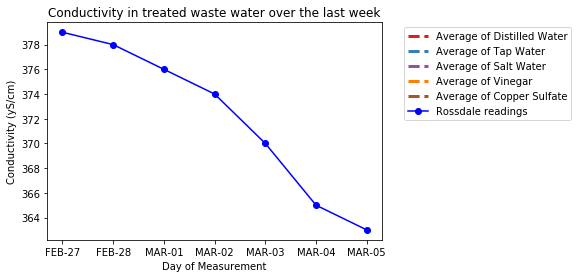

In [30]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

cmap = cm.Set1

norm=Normalize(vmin=0, vmax=len(output_data.index)+1)

for i in range(len(output_data.index)): 
    sample_mean=np.mean([float(output_data.iloc[i,0]),float(output_data.iloc[i,1])])
    plt.axhline(y=sample_mean, c=cmap(norm(i)), ls='dashed', label='Average of ' + output_data.index[i], lw='3')
    


plt.plot(table_RD[0].iloc[6, 1:8], 'bo-', label='Rossdale readings')
#plt.plot(pd.DataFrame(table_RD[0].iloc[6, 1:8].apply(pd.to_numeric)))
plt.xlabel('Day of Measurement')
plt.ylabel('Conductivity (yS/cm)')
plt.title('Conductivity in treated waste water over the last week')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

## Extending
Design and conduct an experiment to investigate the relationship between the amount of a
dissolved solute (such as salt) and electrical conductivity.